In [1]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.1 MB/s eta 0:

In [1]:
import pycaret
pycaret.__version__

'3.1.0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import files
uploads = files.upload()
#from pycaret.datasets import get_data
#dataset = get_data(' ')

Saving Restaurant reviews.csv to Restaurant reviews.csv


In [4]:
from pycaret.datasets import get_data
data = get_data('Restaurant reviews')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [11]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Restaurant', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Restaurant
2,Target type,Multiclass
3,Target mapping,"10 Downing Street: 0, 13 Dhaba: 1, 3B's - Buddies, Bar & Barbecue: 2, AB's - Absolute Barbecues: 3, Absolute Sizzlers: 4, Al Saba Restaurant: 5, American Wild Wings: 6, Amul: 7, Arena Eleven: 8, Aromas@11SIX: 9, Asian Meal Box: 10, B-Dubs: 11, Banana Leaf Multicuisine Restaurant: 12, Barbeque Nation: 13, Behrouz Biryani: 14, Being Hungry: 15, Beyond Flavours: 16, Biryanis And More: 17, Cafe Eclat: 18, Cascade - Radisson Hyderabad Hitec City: 19, Chinese Pavilion: 20, Club Rogue: 21, Collage - Hyatt Hyderabad Gachibowli: 22, Cream Stone: 23, Delhi-39: 24, Deli 9 Bistro: 25, Desi Bytes: 26, Dine O China: 27, Diners Pavilion: 28, Domino's Pizza: 29, Driven Cafe: 30, Dunkin' Donuts: 31, Eat India Company: 32, Faasos: 33, Feast - Sheraton Hyderabad Hotel: 34, Flechazo: 35, Frio Bistro: 36, GD's: 37, Gal Punjab Di: 38, Green Bawarchi Restaurant: 39, Hitech Bawarchi Food Zone: 40, Hotel Zara Hi-Fi: 41, Hunger Maggi Point: 42, Hyderabad Chefs: 43, Hyderabadi Daawat: 44, Hyper Local: 45, Jonathan's Kitchen - Holiday Inn Express & Suites: 46, KFC: 47, KS Bakers: 48, Karachi Bakery: 49, Karachi Cafe: 50, Khaan Saab: 51, Komatose - Holiday Inn Express & Suites: 52, Kritunga Restaurant: 53, La La Land - Bar & Kitchen: 54, Labonel: 55, Marsala Food Company: 56, Mathura Vilas: 57, Mazzo - Marriott Executive Apartments: 58, Mohammedia Shawarma: 59, Momos Delight: 60, Mustang Terrace Lounge: 61, NorFest - The Dhaba: 62, Olive Garden: 63, Over The Moon Brew Company: 64, Owm Nom Nom: 65, Pakwaan Grand: 66, Paradise: 67, Pista House: 68, Pot Pourri: 69, PourHouse7: 70, Prism Club & Kitchen: 71, Royal Spicy Restaurant: 72, SKYHY: 73, Sardarji's Chaats & More: 74, Shah Ghouse Hotel & Restaurant: 75, Shah Ghouse Spl Shawarma: 76, Shanghai Chef 2: 77, Shree Santosh Dhaba Family Restaurant: 78, Squeeze @ The Lime: 79, T Grill: 80, Tandoori Food Works: 81, Tempteys: 82, The Chocolate Room: 83, The Fisherman's Wharf: 84, The Foodie Monster Kitchen: 85, The Glass Onion: 86, The Indi Grill: 87, The Lal Street - Bar Exchange: 88, The Old Madras Baking Company: 89, The Tilt Bar Republic: 90, Tiki Shack: 91, Triptify: 92, Udipi's Upahar: 93, Ulavacharu: 94, Urban Asia - Kitchen & Bar: 95, Yum Yum Tree - The Arabian Food Court: 96, Zega - Sheraton Hyderabad Hotel: 97, Zing's Northeast Kitchen: 98, eat.fit: 99"
4,Original data shape,"(10000, 8)"
5,Transformed data shape,"(10000, 16)"
6,Transformed train set shape,"(7000, 16)"
7,Transformed test set shape,"(3000, 16)"
8,Numeric features,2
9,Categorical features,5


In [12]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [13]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [16]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.0277,0.0000,0.0277,0.0114,0.0100,0.0179,0.0188,0.3020
lr,Logistic Regression,0.0261,0.5930,0.0261,0.0218,0.0165,0.0163,0.0167,22.1180
lda,Linear Discriminant Analysis,0.0241,0.5794,0.0241,0.0158,0.0122,0.0143,0.0152,0.6620
knn,K Neighbors Classifier,0.0181,0.5100,0.0181,0.0069,0.0069,0.0082,0.0087,0.4370
et,Extra Trees Classifier,0.0171,0.5227,0.0171,0.0148,0.0081,0.0072,0.0092,1.8000
rf,Random Forest Classifier,0.0159,0.5297,0.0159,0.0179,0.0081,0.0059,0.0119,2.8590
nb,Naive Bayes,0.0150,0.5226,0.0150,0.0065,0.0043,0.0051,0.0067,0.3470
xgboost,Extreme Gradient Boosting,0.0149,0.5132,0.0149,0.0188,0.0075,0.0049,0.0183,17.5350
gbc,Gradient Boosting Classifier,0.0140,0.5015,0.0140,0.0167,0.0062,0.0040,0.0179,171.8440
dt,Decision Tree Classifier,0.0137,0.5026,0.0137,0.0132,0.0056,0.0038,0.0164,0.5050


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [17]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0143,0.5036,0.0143,0.0184,0.0069,0.0043,0.0217
1,0.0114,0.5007,0.0114,0.0051,0.0024,0.0014,0.0075
2,0.0143,0.5036,0.0143,0.0151,0.0063,0.0043,0.0157
3,0.0129,0.5014,0.0129,0.0201,0.0052,0.0029,0.0135
4,0.0143,0.5036,0.0143,0.0061,0.0052,0.0043,0.0177
5,0.0100,0.5007,0.0100,0.0101,0.0027,0.0000,0.0000
6,0.0129,0.5021,0.0129,0.0134,0.0047,0.0029,0.0144
7,0.0129,0.5014,0.0129,0.0101,0.0046,0.0029,0.0131
8,0.0157,0.5036,0.0157,0.0218,0.0089,0.0058,0.0231


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


In [19]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0243,0.5119,0.0243,0.0072,0.0083,0.0144,0.0152
1,0.0114,0.5000,0.0114,0.0070,0.0050,0.0014,0.0015
2,0.0229,0.5113,0.0229,0.0134,0.0126,0.0130,0.0136
3,0.0129,0.5054,0.0129,0.0019,0.0029,0.0029,0.0030
4,0.0186,0.5123,0.0186,0.0074,0.0082,0.0087,0.0092
5,0.0171,0.5060,0.0171,0.0025,0.0042,0.0072,0.0076
6,0.0157,0.5117,0.0157,0.0079,0.0056,0.0058,0.0061
7,0.0229,0.5137,0.0229,0.0057,0.0059,0.0130,0.0138
8,0.0186,0.5169,0.0186,0.0074,0.0073,0.0087,0.0091


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0243,0.5889,0.0243,0.0263,0.0163,0.0144,0.0148
1,0.0143,0.5783,0.0143,0.0113,0.0079,0.0043,0.0044
2,0.0300,0.6080,0.0300,0.0180,0.0144,0.0202,0.0209
3,0.0257,0.6112,0.0257,0.0227,0.0135,0.0159,0.0163
4,0.0243,0.5831,0.0243,0.0285,0.0201,0.0144,0.0148
5,0.0229,0.5825,0.0229,0.0151,0.0150,0.0130,0.0133
6,0.0229,0.5920,0.0229,0.0146,0.0131,0.0130,0.0133
7,0.0271,0.5904,0.0271,0.0175,0.0134,0.0173,0.0178
8,0.0314,0.6048,0.0314,0.0279,0.0235,0.0216,0.0222


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0257,0.5184,0.0257,0.0428,0.0190,0.0159,0.0165
1,0.0114,0.4984,0.0114,0.0105,0.0035,0.0014,0.0016
2,0.0171,0.5219,0.0171,0.0162,0.0111,0.0072,0.0076
3,0.0243,0.5132,0.0243,0.0144,0.0075,0.0144,0.0156
4,0.0229,0.5192,0.0229,0.0205,0.0160,0.0130,0.0140
5,0.0200,0.5156,0.0200,0.0083,0.0092,0.0101,0.0108
6,0.0129,0.5147,0.0129,0.0143,0.0090,0.0029,0.0032
7,0.0200,0.5160,0.0200,0.0183,0.0100,0.0101,0.0108
8,0.0100,0.5080,0.0100,0.0090,0.0066,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [22]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_samples_leaf=2,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


In [23]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0314,0.5199,0.0314,0.0204,0.0140,0.0216,0.0228
1,0.0129,0.5114,0.0129,0.0125,0.0060,0.0029,0.0030
2,0.0214,0.5214,0.0214,0.0104,0.0104,0.0115,0.0121
3,0.0171,0.5150,0.0171,0.0036,0.0047,0.0072,0.0076
4,0.0229,0.5233,0.0229,0.0220,0.0133,0.0130,0.0137
5,0.0157,0.5182,0.0157,0.0093,0.0079,0.0058,0.0060
6,0.0114,0.5166,0.0114,0.0182,0.0085,0.0014,0.0015
7,0.0243,0.5185,0.0243,0.0157,0.0115,0.0144,0.0153
8,0.0157,0.5222,0.0157,0.0120,0.0105,0.0058,0.0061


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


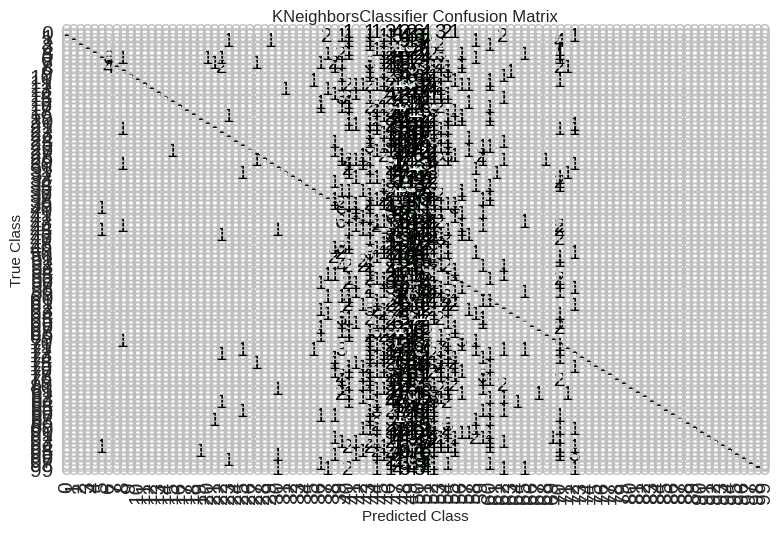

In [27]:
plot_model(tuned_knn, plot = 'confusion_matrix')

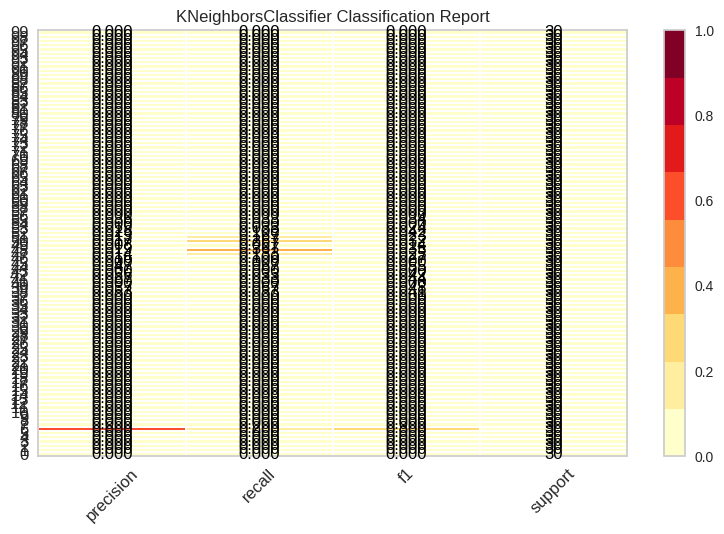

In [28]:
plot_model(tuned_knn, plot = 'class_report')

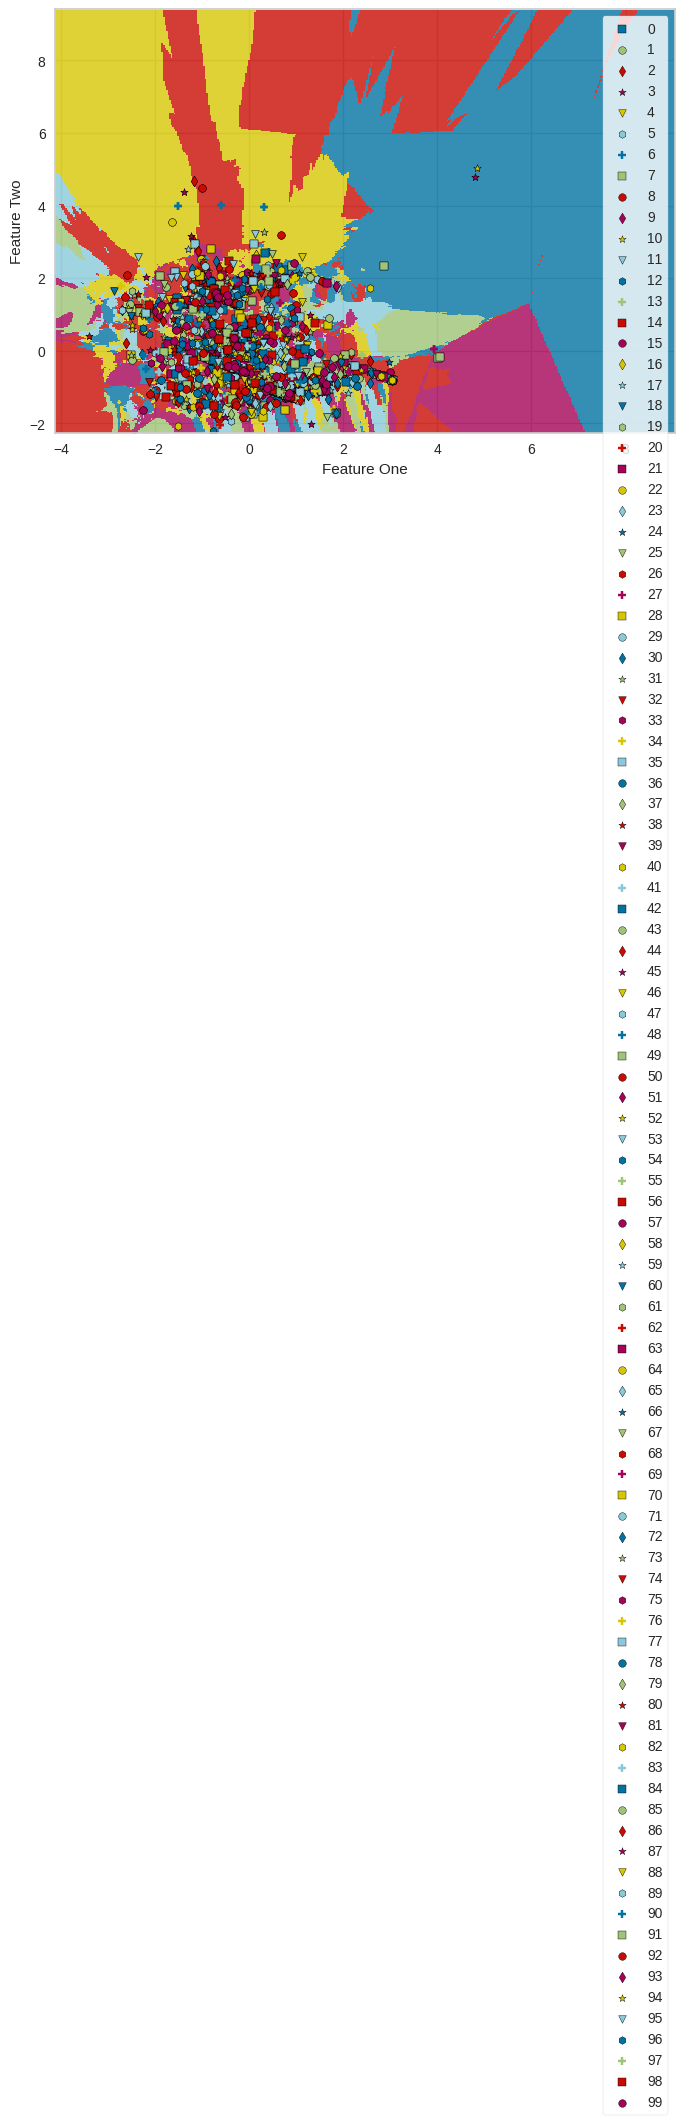

In [29]:
plot_model(tuned_knn, plot='boundary')

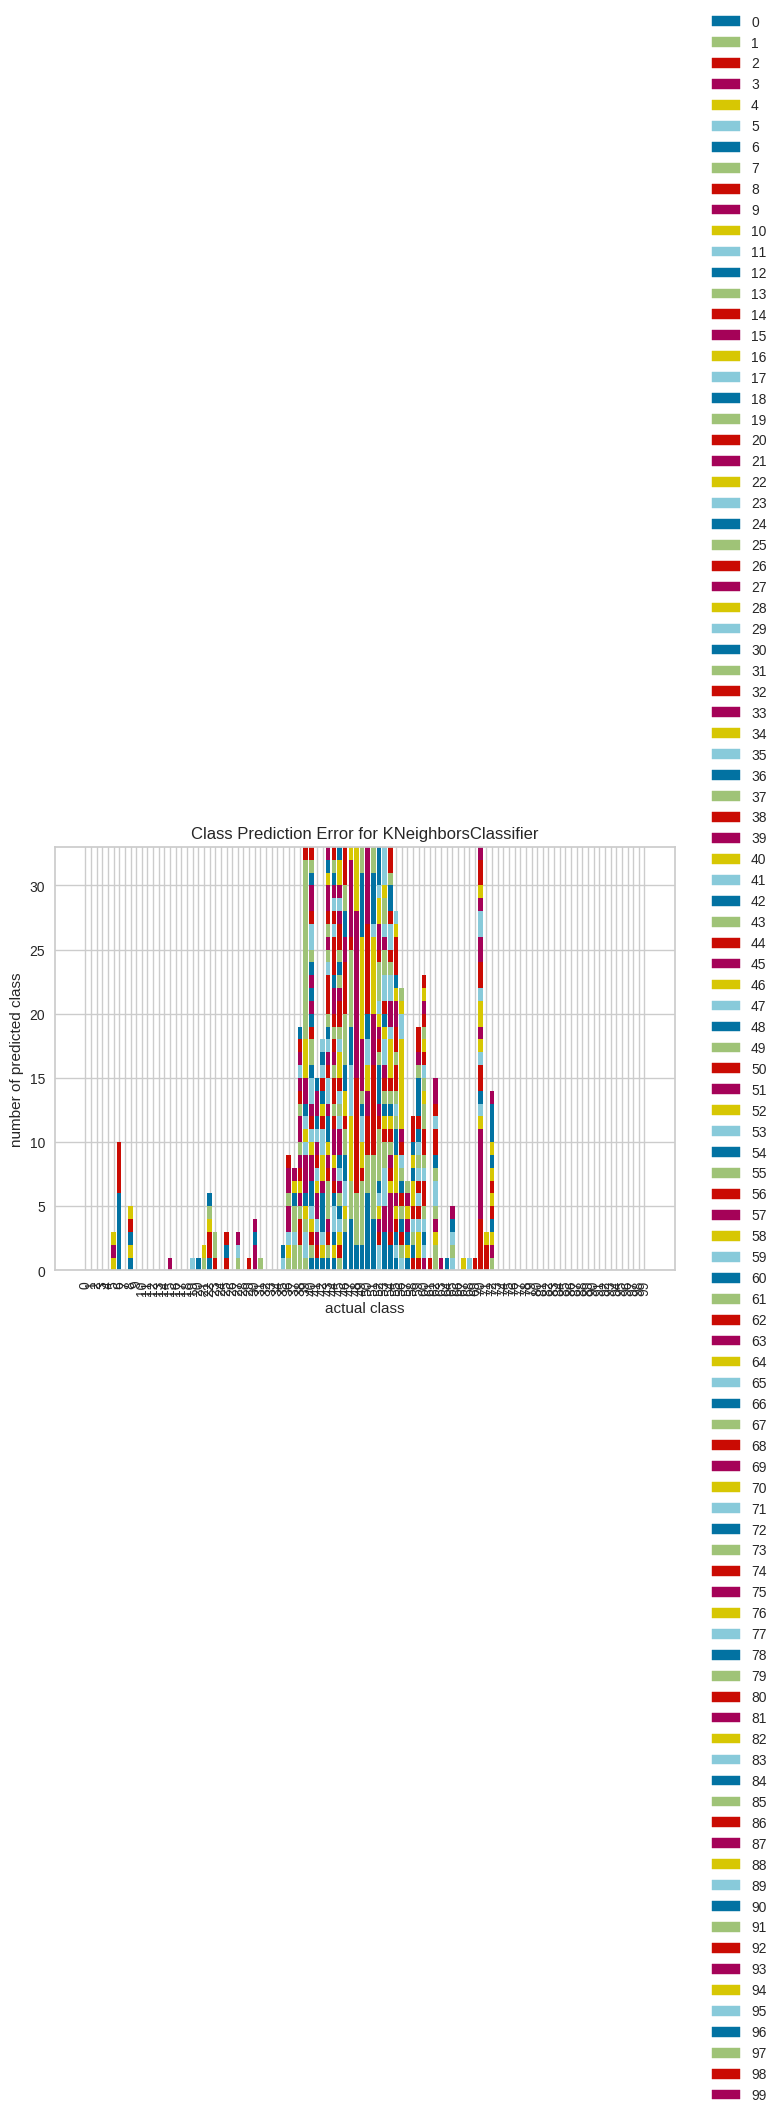

In [30]:
plot_model(tuned_knn, plot = 'error')

In [31]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [32]:
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0170,0.5189,0.0170,0.0102,0.0079,0.0071,0.0074


In [33]:
final_knn = finalize_model(tuned_knn)

In [34]:
print(final_knn)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['Pictures', '7514'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              stra...
                                    transformer=TargetEncoder(cols=['Reviewer',
                                                                    'Review',
                      

In [36]:
save_model(final_knn,'Final KNN Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['Pictures', '7514'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               stra...
                                     transformer=TargetEncoder(cols=['Reviewer',
                                                                     'Review',
        

In [37]:
saved_final_knn = load_model('Final KNN Model')

Transformation Pipeline and Model Successfully Loaded


In [43]:

!pip install gradio

In [44]:
import lightgbm
create_app(lightgbm)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>